In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import dask # just to make sure dask is installed because xarray should use it
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path

from utils.metrics import find_rank, find_quantile_index, compute_chi_squared, compute_cdf, compute_sum_of_squared_deviations
from utils.plot import plot_rank_hist, calibration_plot, calibration_plot_range
 
np.set_printoptions(suppress=True)

# Set configs (beta, esl, nl) to evaluate and directory to save results

In [35]:
CONFIGS = [(1.33, 1, 5), (0.67, 1, 5), (0.67, 5, 100)]
SAVE_DIR = Path('/net/argon/landclim/kraftb/machflow_engression/results/engression/')

# Load Data

In [11]:
# ds = xr.open_zarr('../test.zarr')

ds = xr.open_zarr('/net/argon/landclim/kraftb/machflow_engression/runs_timesplit/combined.zarr/')
ds = ds.loc[{'station': ds['folds'] > 0}]

ds = ds[['Qmm', 'Qmm_mod']]
ds

/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset> Size: 4GB
Dimensions:  (station: 85, time: 4383, beta: 5, esl: 2, nl: 3, member: 100)
Coordinates:
  * beta     (beta) float64 40B 0.33 0.67 1.0 1.33 1.67
  * esl      (esl) int64 16B 1 5
  * member   (member) int64 800B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * nl       (nl) int64 24B 20 5 100
  * station  (station) <U9 3kB 'CHFO-0057' 'CHFO-0073' ... 'CHFO-0263'
  * time     (time) datetime64[ns] 35kB 2011-01-01 2011-01-02 ... 2022-12-31
Data variables:
    Qmm      (station, time) float32 1MB dask.array<chunksize=(85, 1000), meta=np.ndarray>
    Qmm_mod  (beta, esl, nl, member, station, time) float32 4GB dask.array<chunksize=(5, 2, 3, 100, 85, 1000), meta=np.ndarray>

In [12]:
observations = ds.Qmm.isel(time=slice(365, None))
observations

<xarray.DataArray 'Qmm' (station: 85, time: 4018)> Size: 1MB
dask.array<getitem, shape=(85, 4018), dtype=float32, chunksize=(85, 1000), chunktype=numpy.ndarray>
Coordinates:
  * station  (station) <U9 3kB 'CHFO-0057' 'CHFO-0073' ... 'CHFO-0263'
  * time     (time) datetime64[ns] 32kB 2012-01-01 2012-01-02 ... 2022-12-31

In [13]:
pred = ds.Qmm_mod.isel(time=slice(365, None))
pred

<xarray.DataArray 'Qmm_mod' (beta: 5, esl: 2, nl: 3, member: 100, station: 85,
                             time: 4018)> Size: 4GB
dask.array<getitem, shape=(5, 2, 3, 100, 85, 4018), dtype=float32, chunksize=(5, 2, 3, 100, 85, 1000), chunktype=numpy.ndarray>
Coordinates:
  * beta     (beta) float64 40B 0.33 0.67 1.0 1.33 1.67
  * esl      (esl) int64 16B 1 5
  * member   (member) int64 800B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * nl       (nl) int64 24B 20 5 100
  * station  (station) <U9 3kB 'CHFO-0057' 'CHFO-0073' ... 'CHFO-0263'
  * time     (time) datetime64[ns] 32kB 2012-01-01 2012-01-02 ... 2022-12-31

# Run main evaluations and create plots

In [49]:
quantile_values.load()

<xarray.DataArray 'Qmm_mod' (quantile: 99, time: 4018)> Size: 3MB
array([[0.87688664, 0.89375003, 0.86330661, ..., 0.94043353, 0.91666031,
        0.92585554],
       [0.88066483, 0.94373424, 0.89485329, ..., 0.95513004, 0.91770837,
        0.93628053],
       [0.88637589, 0.94648453, 0.94065842, ..., 0.97061479, 0.93484715,
        0.94241717],
       ...,
       [1.70957991, 1.7702847 , 1.88481466, ..., 1.86137145, 1.92451365,
        1.94517863],
       [1.99836098, 1.83268923, 1.90494592, ..., 1.87496144, 1.95753176,
        2.22866298],
       [2.31803117, 2.20993691, 2.11971251, ..., 2.26716748, 2.27734786,
        2.26425438]])
Coordinates:
  * time      (time) datetime64[ns] 32kB 2012-01-01 2012-01-02 ... 2022-12-31
  * quantile  (quantile) float64 792B 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

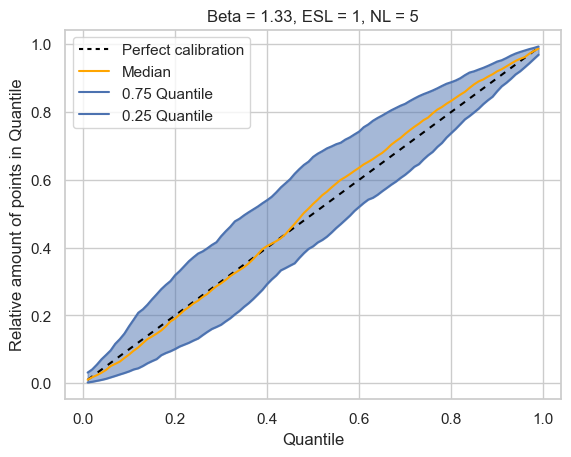

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

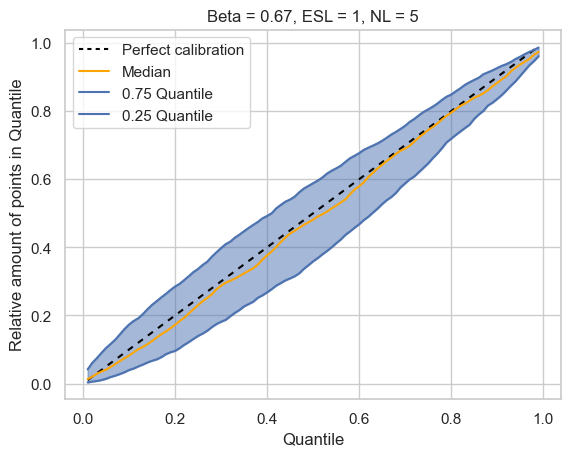

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

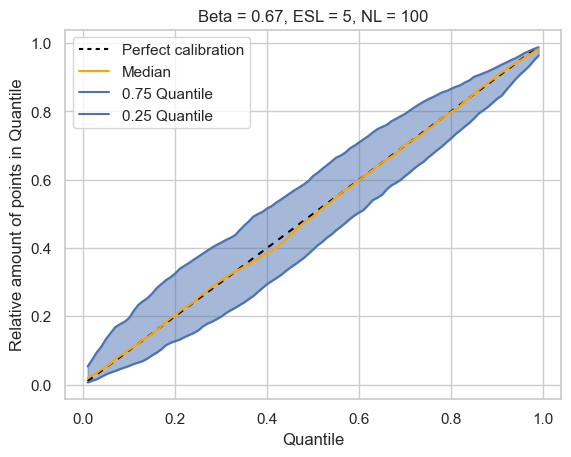

In [14]:
results = {}
quantiles = np.arange(start=0.01, stop=1.0, step=0.01)

for beta, esl, nl in CONFIGS:
    bias = pred.sel(beta=beta, esl=esl, nl=nl) - observations
    relative_bias = bias / (observations + 1e-6)
    cdfs = []
    for station in pred.station:
        results[(beta, esl, nl, station.data.item())] = {}
        station_obs = observations.sel(station=station)
        config_pred = pred.sel(beta=beta, esl=esl, nl=nl, station=station)
        
        ranks = xr.apply_ufunc(
            find_rank,
            station_obs,                        # Observations with ["time"]
            config_pred,                        # Ensemble members with ["member", "time"]
            input_core_dims=[[], ["member"]],   # Observations have no "member" dim, predictions do
            output_core_dims=[[]],              # Output is scalar per observation
            vectorize=True,                     # Apply function element-wise
            dask="parallelized",                # Enable Dask parallelization if needed
            output_dtypes=[np.int16],           # Output type
        )

        ranks = ranks.compute().data.flatten() # Work with flat numpy array
        ranks = ranks[ranks != -1]
        chi_squared = compute_chi_squared(ranks=ranks, num_members=len(config_pred.member))
        results[(beta, esl, nl, station.data.item())]['Chi^2'] = chi_squared

        save_dir_rank_hist = Path(SAVE_DIR / f'rank_histograms/per-station/{station.data.item()}/')
        save_dir_rank_hist.mkdir(exist_ok=True, parents=True)
        plot_rank_hist(ranks=ranks,
                       title=f'Beta = {beta}, ESL = {esl}, NL = {nl}\n$\chi^2$ = {chi_squared:.2f}',
                       save_file=save_dir_rank_hist / f'rankhist_beta{beta}_esl{esl}_nl{nl}.eps',
                       display=False) 


        quantile_values = config_pred.quantile(quantiles, dim='member')
        quantile_indices = xr.apply_ufunc(
            find_quantile_index,
            station_obs,                        # Observations with ["time"]
            quantile_values,                    # Quantiles with ["quantile", "time"]
            input_core_dims=[[], ["quantile"]], # Observations have no "quantile", quantiles do
            output_core_dims=[[]],              # Output is scalar per observation
            vectorize=True,                     # Apply function element-wise
            dask="parallelized",                # Enable Dask parallelization if needed
            output_dtypes=[np.int16],           # Output type
        )

        quantile_indices = quantile_indices.compute().data.flatten() # Work with flat numpy array
        quantile_indices = quantile_indices[quantile_indices != -1]
        
        cdf_pred = compute_cdf(quantile_indices=quantile_indices, num_quantiles=len(quantiles))
        cdfs.append(cdf_pred)
        sum_of_squared_deviations = compute_sum_of_squared_deviations(quantiles, cdf_pred)
        results[(beta, esl, nl, station.data.item())]['RSS'] = sum_of_squared_deviations

        save_dir_calibration_plot = Path(SAVE_DIR / f'calibration_plots/per-station/{station.data.item()}/')
        save_dir_calibration_plot.mkdir(exist_ok=True, parents=True)
        calibration_plot(
            x=quantiles,
            cdf_pred=cdf_pred,
            title=f'Beta = {beta}, ESL = {esl}, NL = {nl}\nRSS = {sum_of_squared_deviations:.2f}',
            x_name='Quantile',
            save_file=save_dir_calibration_plot / f'calib_plot_beta{beta}_esl{esl}_nl{nl}.eps',
            display=False
        )
        
        station_bias = bias.sel(station=station).compute()
        results[(beta, esl, nl, station.data.item())]['Mean Bias'] = station_bias.mean(skipna=True).item()
        results[(beta, esl, nl, station.data.item())]['Median Bias'] = station_bias.median(skipna=True).item()

        station_relative_bias = relative_bias.sel(station=station).compute()
        results[(beta, esl, nl, station.data.item())]['Mean Relative Bias'] = station_relative_bias.mean(skipna=True).item()
        results[(beta, esl, nl, station.data.item())]['Median Relative Bias'] = station_relative_bias.median(skipna=True).item()

    # Make calibration plot over all stations, show everything between low and high quantile as shaded area
    calibration_plot_range(
        x=quantiles,
        cdf_per_station=np.array(cdfs),
        high_quantile=0.75,
        low_quantile=0.25,
        title=f'Beta = {beta}, ESL = {esl}, NL = {nl}',
        x_name='Quantile',
        save_file=Path(SAVE_DIR / f'calibration_plots/calib_plot_range_beta{beta}_esl{esl}_nl{nl}.eps'),
        display=True
    )

In [15]:
res_df = pd.DataFrame(results)
res_df = res_df.sort_index(axis=1)
res_df.to_csv(SAVE_DIR / 'per_station_results.csv')
res_df

0.67                                       \
                               1                                        
                               5                                        
                       CHFO-0057   CHFO-0073    CHFO-0081   CHFO-0083   
Chi^2                 344.757591  916.923345  2226.001991  133.043587   
RSS                     0.090247    0.302286     2.278174    0.054211   
Mean Bias              -0.145230   -0.199725     0.269864   -0.191323   
Median Bias             0.004818    0.026762     0.177823   -0.007640   
Mean Relative Bias      0.101080    0.039394     0.126256    0.068614   
Median Relative Bias    0.006810    0.015956     0.090235   -0.004225   

                                                                       \
                                                                        
                                                                        
                        CHFO-0086   CHFO-0088   CHFO-0089   CHFO-0090   
Chi^2                 2097.703335  351.041812  528.960677  986.150324   
RSS                      3.852763    0.439283    0.500243    2.277142   
Mean Bias               -0.142259   -0.075618   -0.070640   -0.148322   
Median Bias             -0.099457   -0.069231   -0.037258   -0.081510   
Mean Relative Bias      -0.079367   -0.002907    0.005234   -0.047277   
Median Relative Bias    -0.111398   -0.031683   -0.039595   -0.080477   

                                               ...         1.33              \
                                               ...            1               
                                               ...            5               
                       CHFO-0094    CHFO-0095  ...    CHFO-0238   CHFO-0240   
Chi^2                 399.757093  1065.381782  ...  1661.075660  798.076157   
RSS                     0.422305     1.245612  ...     3.266663    0.819775   
Mean Bias               0.362281    -0.107555  ...    -0.375622   -0.101476   
Median Bias             0.161328    -0.071607  ...    -0.302464    0.063194   
Mean Relative Bias      0.074760    -0.018529  ...    -0.056115  387.868896   
Median Relative Bias    0.036240    -0.041281  ...    -0.138540    0.093470   

                                                                         \
                                                                          
                                                                          
                        CHFO-0241    CHFO-0242   CHFO-0243    CHFO-0248   
Chi^2                 1645.390244  2550.267795  288.953708  5653.768044   
RSS                      3.696078     3.420088    0.355454     5.115966   
Mean Bias               -0.535646    -0.432704    0.032879     1.153606   
Median Bias             -0.282790    -0.153370    0.061649     0.403418   
Mean Relative Bias      -0.053347    -0.073820    0.225781     0.405815   
Median Relative Bias    -0.158125    -0.158588    0.058505     0.235956   

                                                                        
                                                                        
                                                                        
                       CHFO-0250   CHFO-0251    CHFO-0258    CHFO-0263  
Chi^2                 696.774515  990.172225  5692.030414  2177.085615  
RSS                     0.252736    0.745087     4.818666     4.347669  
Mean Bias              -0.073955   -0.466482     1.118341     0.600995  
Median Bias            -0.047783   -0.101798     0.480063     0.305977  
Mean Relative Bias      0.098909    0.085467     0.424849     0.212366  
Median Relative Bias   -0.031930   -0.069887     0.227407     0.153273  

[6 rows x 255 columns]

### If per_station_results.csv exists, everything below this point can be run independently from the cells above, apart from the configs and save_dir that are set at the start

In [40]:
import pandas as pd

res_df = pd.read_csv(SAVE_DIR / 'per_station_results.csv', index_col=0, header=[0, 1, 2, 3])

configs = [(1.33, 1, 5), (0.67, 1, 5), (0.67, 5, 100)]
configs = [(str(config[0]), str(config[1]), str(config[2])) for config in configs]

res_df

0.67                                       \
                               1                                        
                               5                                        
                       CHFO-0057   CHFO-0073    CHFO-0081   CHFO-0083   
Chi^2                 344.757591  916.923345  2226.001991  133.043587   
RSS                     0.090247    0.302286     2.278174    0.054211   
Mean Bias              -0.145230   -0.199725     0.269864   -0.191323   
Median Bias             0.004818    0.026762     0.177823   -0.007640   
Mean Relative Bias      0.101080    0.039394     0.126256    0.068614   
Median Relative Bias    0.006810    0.015956     0.090235   -0.004225   

                                                                       \
                                                                        
                                                                        
                        CHFO-0086   CHFO-0088   CHFO-0089   CHFO-0090   
Chi^2                 2097.703335  351.041812  528.960677  986.150324   
RSS                      3.852763    0.439283    0.500243    2.277142   
Mean Bias               -0.142259   -0.075618   -0.070640   -0.148322   
Median Bias             -0.099457   -0.069231   -0.037258   -0.081510   
Mean Relative Bias      -0.079367   -0.002907    0.005234   -0.047277   
Median Relative Bias    -0.111398   -0.031683   -0.039595   -0.080477   

                                               ...         1.33              \
                                               ...            1               
                                               ...            5               
                       CHFO-0094    CHFO-0095  ...    CHFO-0238   CHFO-0240   
Chi^2                 399.757093  1065.381782  ...  1661.075660  798.076157   
RSS                     0.422305     1.245612  ...     3.266663    0.819775   
Mean Bias               0.362281    -0.107555  ...    -0.375622   -0.101476   
Median Bias             0.161328    -0.071607  ...    -0.302464    0.063194   
Mean Relative Bias      0.074760    -0.018529  ...    -0.056115  387.868896   
Median Relative Bias    0.036240    -0.041281  ...    -0.138540    0.093470   

                                                                         \
                                                                          
                                                                          
                        CHFO-0241    CHFO-0242   CHFO-0243    CHFO-0248   
Chi^2                 1645.390244  2550.267795  288.953708  5653.768044   
RSS                      3.696078     3.420088    0.355454     5.115966   
Mean Bias               -0.535646    -0.432704    0.032879     1.153606   
Median Bias             -0.282790    -0.153370    0.061649     0.403418   
Mean Relative Bias      -0.053347    -0.073820    0.225781     0.405815   
Median Relative Bias    -0.158125    -0.158588    0.058505     0.235956   

                                                                        
                                                                        
                                                                        
                       CHFO-0250   CHFO-0251    CHFO-0258    CHFO-0263  
Chi^2                 696.774515  990.172225  5692.030414  2177.085615  
RSS                     0.252736    0.745087     4.818666     4.347669  
Mean Bias              -0.073955   -0.466482     1.118341     0.600995  
Median Bias            -0.047783   -0.101798     0.480063     0.305977  
Mean Relative Bias      0.098909    0.085467     0.424849     0.212366  
Median Relative Bias   -0.031930   -0.069887     0.227407     0.153273  

[6 rows x 255 columns]

In [21]:
for config in configs:
    print(config, '- RSS:', res_df[config].loc['RSS'].mean())
    print(config, '- Chi^2:', res_df[config].loc['Chi^2'].mean())
    print(config, '- Mean of the station-wise median relative bias: ', res_df[config].loc['Median Relative Bias'].mean())

('1.33', '1', '5') - RSS: 1.9288794291088172
('1.33', '1', '5') - Chi^2: 1725.3010324879453
('1.33', '1', '5') - Mean of the station-wise median relative bias:  0.015252283831839172
('0.67', '1', '5') - RSS: 1.52969598165386
('0.67', '1', '5') - Chi^2: 1604.4416017056087
('0.67', '1', '5') - Mean of the station-wise median relative bias:  -0.004016854734543491
('0.67', '5', '100') - RSS: 1.4416209845868309
('0.67', '5', '100') - Chi^2: 1519.6662431206476
('0.67', '5', '100') - Mean of the station-wise median relative bias:  0.006634475937222734


### Select best configuration manually

In [18]:
best_config_results = res_df[('0.67', '5', '100')].transpose()
best_config_results.sort_values(by='Chi^2', axis=0)

,Chi^2,RSS,Mean Bias,Median Bias,Mean Relative Bias,Median Relative Bias
CHFO-0149,103.342957,0.005339,-0.194637,-0.004386,0.144255,-0.002755
CHFO-0158,104.851170,0.001547,0.036223,0.000900,0.049230,0.000730
CHFO-0083,133.043587,0.054211,-0.191323,-0.007640,0.068614,-0.004225
CHFO-0178,151.706322,0.088814,-0.067596,-0.029096,0.080581,-0.023187
CHFO-0222,154.471379,0.091134,-0.012336,0.023251,0.120079,0.023485
...,...,...,...,...,...,...
CHFO-0186,9452.202588,3.318863,-0.565122,-0.364718,-0.090593,-0.108011
CHFO-0118,9974.295669,8.511792,0.712583,0.378968,0.269612,0.206912
CHFO-0248,12554.194624,4.694777,0.576726,0.320984,0.300942,0.200415
CHFO-0227,15734.060727,1.444130,0.621045,0.212315,0.870640,0.114910


In [17]:
stations_coords = pd.read_csv('stations_coords.csv', index_col='mach_id')
best_config_results = best_config_results.join(stations_coords)
best_config_results

,Chi^2,RSS,Mean Bias,Median Bias,Mean Relative Bias,Median Relative Bias,place,water_name,coord_easting,coord_northing
CHFO-0057,344.757591,0.090247,-0.145230,0.004818,0.101080,0.006810,Payerne-Caserne_d'aviation,Broye,2561660.0,1187320.0
CHFO-0073,916.923345,0.302286,-0.199725,0.026762,0.039394,0.015956,Andermatt,Reuss,2688120.0,1166320.0
CHFO-0081,2226.001991,2.278174,0.269864,0.177823,0.126256,0.090235,Gsteig,Lütschine,2633130.0,1168200.0
CHFO-0083,133.043587,0.054211,-0.191323,-0.007640,0.068614,-0.004225,Appenzell,Sitter,2749040.0,1244220.0
CHFO-0086,2097.703335,3.852763,-0.142259,-0.099457,-0.079367,-0.111398,Moutier-La_Charrue,Birse,2595740.0,1237010.0
...,...,...,...,...,...,...,...,...,...,...
CHFO-0248,12554.194624,4.694777,0.576726,0.320984,0.300942,0.200415,NaN,NaN,NaN,NaN
CHFO-0250,1947.937780,0.348746,-0.040521,-0.038285,0.090069,-0.026456,Emmen,Kleine_Emme,2663700.0,1213630.0
CHFO-0251,1213.488303,0.176380,-0.046552,0.038886,0.209975,0.028885,Einsiedeln-Gross,Grossbach,2700710.0,1218125.0
CHFO-0258,1881.737835,1.879858,0.759509,0.219086,0.236574,0.125112,Erstfeld-Bodenberg,Alpbach,2688560.0,1185120.0


### Plot HP vs performance

In [39]:
configs

[('1.33', '1', '5'), ('0.67', '1', '5'), ('0.67', '5', '100')]

In [37]:
config_perf = []

for config in configs:
    config_perf.append({'beta': config[0], 'esl': config[1], 'nl': config[2], 'RSS': res_df[config].loc['RSS'].mean(), 'Chi^2': res_df[config].loc['Chi^2'].mean(), 'Mean bias': res_df[config].loc['Mean Bias'].mean(), 'Median bias': res_df[config].loc['Median Bias'].mean(), 'Mean relative bias': res_df[config].loc['Mean Relative Bias'].mean(), 'Median relative bias': res_df[config].loc['Median Relative Bias'].mean()})

In [38]:
pd.DataFrame(config_perf)

,beta,esl,nl,RSS,Chi^2,Mean bias,Median bias,Mean relative bias,Median relative bias
0,1.33,1,5,1.928879,1725.301032,0.018225,0.015387,4.679331,0.015252
1,0.67,1,5,1.529696,1604.441602,-0.100766,-0.006657,4.209821,-0.004017
2,0.67,5,100,1.441621,1519.666243,-0.046157,0.003439,5.056633,0.006634


# Maps

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(best_config_results.coord_easting, best_config_results.coord_northing)]
best_config_results = gpd.GeoDataFrame(best_config_results[['Chi^2', 'RSS', 'Median Relative Bias', 'place', 'water_name']], crs='EPSG:2056', geometry=geometry)
best_config_results

In [ ]:
best_config_results['log_RSS'] = np.log(best_config_results['RSS'])
best_config_results['log_Chi^2'] = np.log(best_config_results['Chi^2'])

In [ ]:
from utils.plot import switzerland_map_plot

col = 'Median Relative Bias' # one of: ['RSS', 'log_RSS', 'Chi^2', 'log_Chi^2', 'Median Relative Bias']
switzerland_map_plot(
    results=best_config_results, 
    col=col,
    save_file=SAVE_DIR / f'{col}_map.eps',
    display=True
)

### Interactive maps

In [ ]:
col = 'Median Relative Bias'
vmin = best_config_results[col].min()
vmax = best_config_results[col].max()
abs_vmax = max(abs(vmin), abs(vmax))
map = best_config_results.explore(
    column=col,
    cmap='seismic',
    vmin=-abs_vmax,
    vmax=abs_vmax,
    marker_kwds={'radius': 10},
    style_kwds={
        'stroke': True,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.8
    }
)

root = map.get_root()
root.width = 1200
root.height = 700
display(map)

In [ ]:
map.save(SAVE_DIR / f'{col}.html')